In [2]:
import pandas as pd

# Cargar el archivo CSV
file_path = "dataset_comp_ratio.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas para revisar el contenido
df.head()

df.drop(columns=["LONGITUD_NUM"], inplace=True, errors='ignore')
df.drop(columns=["LATITUD_NUM"], inplace=True, errors='ignore')
df.drop(columns=["PLAZA_CVE"], inplace=True, errors='ignore')
df.drop(columns=["META_VENTA"], inplace=True, errors='ignore')



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Variables
y = df['RATIO_CUMPLIMIENTO']
X = df.drop(columns=['VENTA_TOTAL', 'TIENDA_ID', 'LATITUD_NUM_x', 'LONGITUD_NUM_x',
                     'LATITUD_NUM_y', 'LONGITUD_NUM_y', 'RATIO_CUMPLIMIENTO'], errors='ignore')

# Identificar tipos
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocesamiento
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

# Modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


# Filtrar datos para eliminar valores nulos en la variable objetivo
df_filtrado = df[df['RATIO_CUMPLIMIENTO'].notna()].copy()

# Redefinir X e y
y = df_filtrado['RATIO_CUMPLIMIENTO']
X = df_filtrado.drop(columns=['VENTA_TOTAL', 'TIENDA_ID', 'LATITUD_NUM_x', 'LONGITUD_NUM_x',
                              'LATITUD_NUM_y', 'LONGITUD_NUM_y', 'RATIO_CUMPLIMIENTO'], errors='ignore')

# Entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['dist_comp_directa',
                                                   'num_comp_directa',
                                                   'dist_comp_indirecta',
                                                   'num_comp_indirecta',
                                                   'MTS2VENTAS_NUM',
                                                   'PUERTASREFRIG_NUM']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['NIVELSOCIOECONOMICO_DES',
                                                   'ENTORNO_DES',
                                                   'SEGMENTO_MAESTRO_DESC',
                                                   'LID_UBICACION_TIENDA',
                                                   'DATASET'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

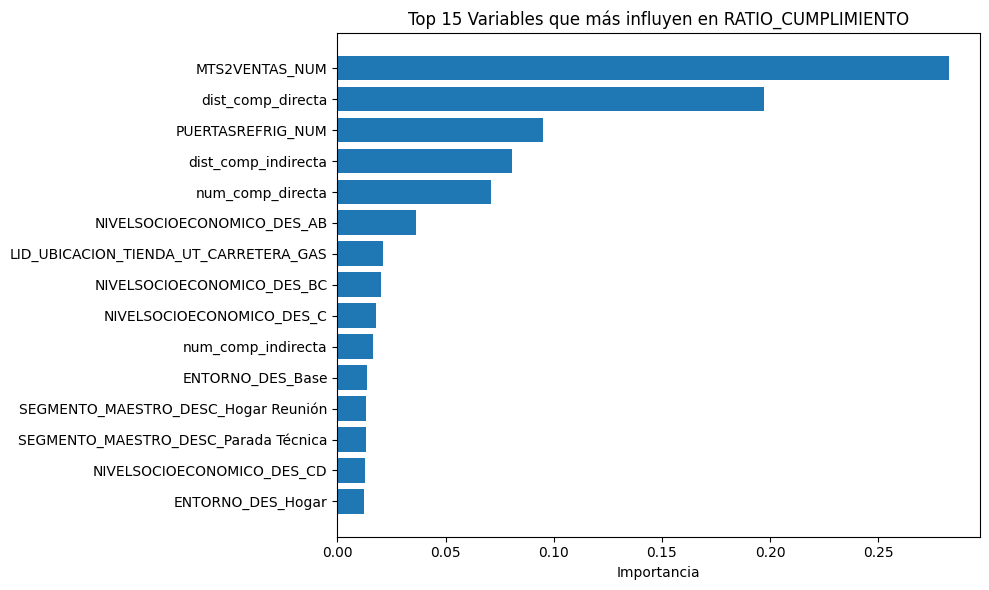

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Obtener el modelo entrenado
rf = model.named_steps['regressor']

# Obtener nombres de variables transformadas
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_cols)
feature_names = num_cols + list(cat_feature_names)

# Obtener importancias
importances = rf.feature_importances_
importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False).head(15)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(importances_df['feature'], importances_df['importance'])
plt.xlabel("Importancia")
plt.title("Top 15 Variables que más influyen en RATIO_CUMPLIMIENTO")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


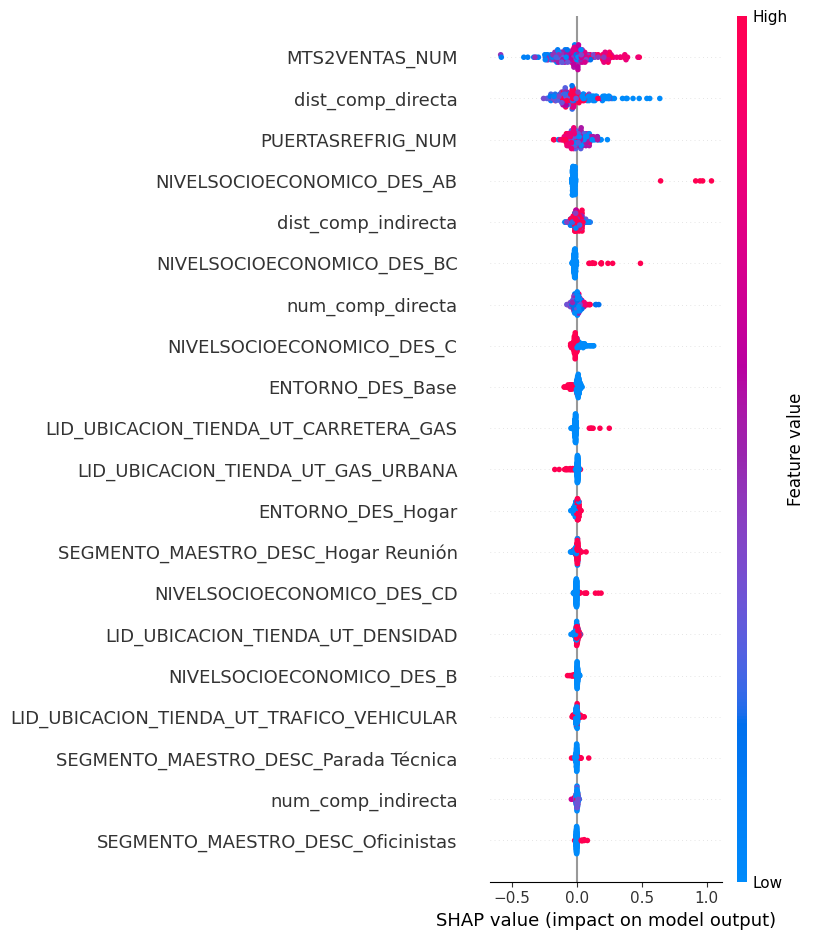

In [5]:
import shap

# Usar el modelo sin el pipeline para SHAP (solo Random Forest y datos transformados)
X_transformed = model.named_steps['preprocessor'].transform(X_test)
explainer = shap.TreeExplainer(model.named_steps['regressor'])
shap_values = explainer.shap_values(X_transformed)

# Obtener nombres de las features transformadas
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_cols)
feature_names = num_cols + list(cat_feature_names)

# Crear un summary plot
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)


In [ ]:
#Entorno USUARIO- BASE

In [6]:
# Filtrar solo las filas donde ENTORNO_DES_x es 'Base'
df_base = df[df['ENTORNO_DES'] == 'Base'].copy()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Variables
y = df_base['RATIO_CUMPLIMIENTO']
X = df_base.drop(columns=['VENTA_TOTAL', 'TIENDA_ID', 'LATITUD_NUM_x', 'LONGITUD_NUM_x',
                     'LATITUD_NUM_y', 'LONGITUD_NUM_y', 'RATIO_CUMPLIMIENTO'], errors='ignore')

# Identificar tipos
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocesamiento
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

# Modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


# Filtrar datos para eliminar valores nulos en la variable objetivo
df_filtradob = df_base[df_base['RATIO_CUMPLIMIENTO'].notna()].copy()

# Redefinir X e y
y = df_filtradob['RATIO_CUMPLIMIENTO']
X = df_filtradob.drop(columns=['VENTA_TOTAL', 'TIENDA_ID', 'LATITUD_NUM_x', 'LONGITUD_NUM_x',
                              'LATITUD_NUM_y', 'LONGITUD_NUM_y', 'RATIO_CUMPLIMIENTO'], errors='ignore')

# Entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['dist_comp_directa',
                                                   'num_comp_directa',
                                                   'dist_comp_indirecta',
                                                   'num_comp_indirecta',
                                                   'MTS2VENTAS_NUM',
                                                   'PUERTASREFRIG_NUM']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['NIVELSOCIOECONOMICO_DES',
                                                   'ENTORNO_DES',
                                                   'SEGMENTO_MAESTRO_DESC',
                                                   'LID_UBICACION_TIENDA',
                                                   'DATASET'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

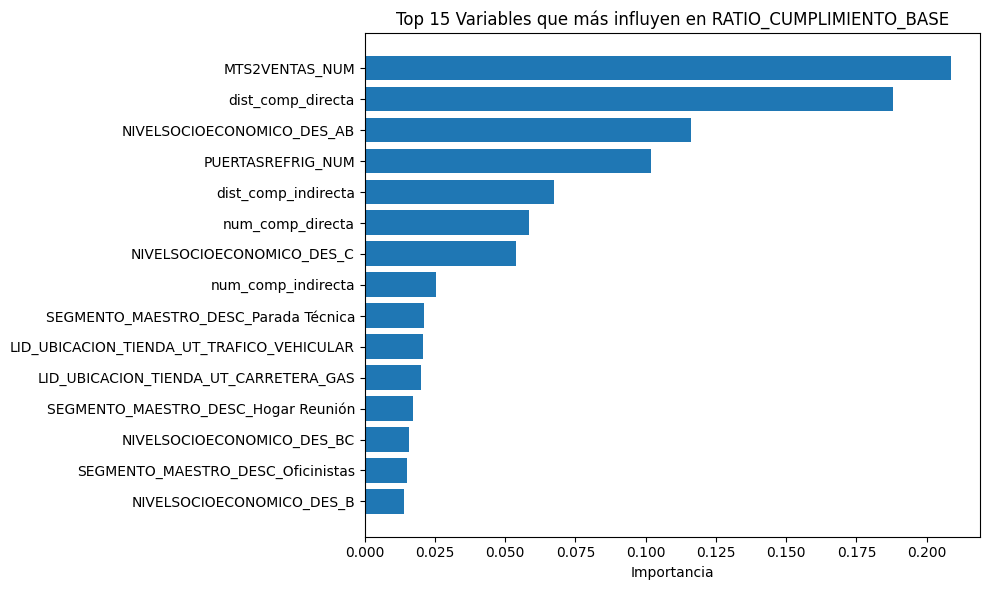

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Obtener el modelo entrenado
rf = model.named_steps['regressor']

# Obtener nombres de variables transformadas
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_cols)
feature_names = num_cols + list(cat_feature_names)

# Obtener importancias
importances = rf.feature_importances_
importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False).head(15)
###
top_features = importances_df['feature'].tolist()


# Graficar
plt.figure(figsize=(10, 6))
plt.barh(importances_df['feature'], importances_df['importance'])
plt.xlabel("Importancia")
plt.title("Top 15 Variables que más influyen en RATIO_CUMPLIMIENTO_BASE")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [90]:
nueva_tienda = pd.DataFrame([{
    'dist_comp_directa': 5,
    'num_comp_directa': 10,
    'dist_comp_indirecta': 10,
    'num_comp_indirecta': 10,
    'NIVELSOCIOECONOMICO_DES': 'AB',
    'ENTORNO_DES': 'BASE',
    'MTS2VENTAS_NUM': 50,
    'PUERTASREFRIG_NUM': 3,
    'SEGMENTO_MAESTRO_DESC': 'Oficinistas',
    'LID_UBICACION_TIENDA': 'UT_TRAFICO_VEHICULAR',
    'DATASET': 'Modelo'
}])
prediccion = model.predict(nueva_tienda)
print(f"Predicción del RATIO_CUMPLIMIENTO estimado: {prediccion[0]:.2f}")



Predicción del RATIO_CUMPLIMIENTO estimado: 2.75


In [93]:
# Pedir los datos al usuario
print("Introduce las características de la nueva tienda:\n")

dist_comp_directa = float(input("Distancia a competencia directa (ej. 0.5): "))
num_comp_directa = int(input("Número de competidores directos (ej. 4): "))
dist_comp_indirecta = float(input("Distancia a competencia indirecta (ej. 0.7): "))
num_comp_indirecta = int(input("Número de competidores indirectos (ej. 2): "))
nivel_socio = input("Nivel socioeconómico (ej. AB, C, BC): ")
entorno = input("Entorno (ej. BASE, PLUS): ")
mts2ventas = float(input("Metros cuadrados de ventas (ej. 150): "))
puertas_refrig = int(input("Número de puertas de refrigerador (ej. 3): "))
segmento = input("Segmento maestro (ej. Parada Técnica): ")
ubicacion = input("Ubicación de la tienda (ej. UT_TRAFICO_VEHICULAR): ")
dataset = input("Tipo de dataset (ej. Modelo): ")

# Crear el DataFrame con los datos ingresados
nueva_tienda = pd.DataFrame([{
    'dist_comp_directa': dist_comp_directa,
    'num_comp_directa': num_comp_directa,
    'dist_comp_indirecta': dist_comp_indirecta,
    'num_comp_indirecta': num_comp_indirecta,
    'NIVELSOCIOECONOMICO_DES': nivel_socio,
    'ENTORNO_DES': entorno,
    'MTS2VENTAS_NUM': mts2ventas,
    'PUERTASREFRIG_NUM': puertas_refrig,
    'SEGMENTO_MAESTRO_DESC': segmento,
    'LID_UBICACION_TIENDA': ubicacion,
    'DATASET': dataset
}])

# Hacer la predicción
prediccion = model.predict(nueva_tienda)
print(f"\n📊 Predicción del RATIO_CUMPLIMIENTO estimado: {prediccion[0]:.2f}")


Introduce las características de la nueva tienda:

Distancia a competencia directa (ej. 0.5): 1000
Número de competidores directos (ej. 4): 2
Distancia a competencia indirecta (ej. 0.7): 1000
Número de competidores indirectos (ej. 2): 3
Nivel socioeconómico (ej. AB, C, BC): AB
Entorno (ej. BASE, PLUS): BASE
Metros cuadrados de ventas (ej. 150): 150
Número de puertas de refrigerador (ej. 3): 13
Segmento maestro (ej. Parada Técnica): Parada Técnica
Ubicación de la tienda (ej. UT_TRAFICO_VEHICULAR): UT_TRAFICO_VEHICULAR
Tipo de dataset (ej. Modelo): Modelo

📊 Predicción del RATIO_CUMPLIMIENTO estimado: 4.90


In [44]:
#!pip install ace_tools

In [77]:
import pandas as pd
import numpy as np
from IPython.display import display
import ipywidgets as widgets

# --------- [1] Crear función de estimación por coincidencia parcial ---------
def estimar_ratio_aproximado(inputs, tabla):
    input_vals = [
        inputs['MTS2VENTAS_NUM_RANGO'],
        inputs['dist_comp_directa_RANGO'],
        inputs['PUERTASREFRIG_NUM_RANGO'],
        inputs['dist_comp_indirecta_RANGO'],
        inputs['NIVELSOCIOECONOMICO_DES']
    ]

    def contar_coincidencias(row):
        row_vals = [
            row['MTS2VENTAS_NUM_RANGO'],
            row['dist_comp_directa_RANGO'],
            row['PUERTASREFRIG_NUM_RANGO'],
            row['dist_comp_indirecta_RANGO'],
            row['NIVELSOCIOECONOMICO_DES']
        ]
        return sum([1 for a, b in zip(input_vals, row_vals) if a == b])

    tabla = tabla.copy()
    tabla['coincidencias'] = tabla.apply(contar_coincidencias, axis=1)
    coincidencias_parciales = tabla[(tabla['coincidencias'] >= 3) & (~tabla['ratio_promedio'].isna())]

    if not coincidencias_parciales.empty:
        ratio_aprox = coincidencias_parciales['ratio_promedio'].mean()
        return f"🔁 Ratio aproximado basado en coincidencia parcial: {ratio_aprox:.4f}"
    else:
        return "⚠️ No hay suficientes coincidencias parciales con datos válidos para estimar un ratio."


# --------- [2] Crear Widgets con valores del dataframe ---------
mts2_options = sorted(tabla_promedios['MTS2VENTAS_NUM_RANGO'].dropna().unique(), key=lambda x: x.left)
dist_directa_options = sorted(tabla_promedios['dist_comp_directa_RANGO'].dropna().unique(), key=lambda x: x.left)
puertas_options = sorted(tabla_promedios['PUERTASREFRIG_NUM_RANGO'].dropna().unique(), key=lambda x: x.left)
dist_indirecta_options = sorted(tabla_promedios['dist_comp_indirecta_RANGO'].dropna().unique(), key=lambda x: x.left)
nivel_options = sorted(tabla_promedios['NIVELSOCIOECONOMICO_DES'].dropna().unique())

mts2_dropdown = widgets.Dropdown(options=mts2_options, description='MTS2:')
dist_directa_dropdown = widgets.Dropdown(options=dist_directa_options, description='Dist Dir:')
puertas_dropdown = widgets.Dropdown(options=puertas_options, description='Puertas:')
dist_indirecta_dropdown = widgets.Dropdown(options=dist_indirecta_options, description='Dist Indir:')
nivel_dropdown = widgets.Dropdown(options=nivel_options, description='Nivel:')
output = widgets.Output()


# --------- [3] Función que reacciona al cambio en cualquier dropdown ---------
def on_change_aproximado(change):
    if change['type'] == 'change' and change['name'] == 'value':
        entrada = {
            'MTS2VENTAS_NUM_RANGO': mts2_dropdown.value,
            'dist_comp_directa_RANGO': dist_directa_dropdown.value,
            'PUERTASREFRIG_NUM_RANGO': puertas_dropdown.value,
            'dist_comp_indirecta_RANGO': dist_indirecta_dropdown.value,
            'NIVELSOCIOECONOMICO_DES': nivel_dropdown.value
        }
        with output:
            output.clear_output()
            print(estimar_ratio_aproximado(entrada, tabla_promedios))


# --------- [4] Conectar los widgets con la función ---------
mts2_dropdown.observe(on_change_aproximado)
dist_directa_dropdown.observe(on_change_aproximado)
puertas_dropdown.observe(on_change_aproximado)
dist_indirecta_dropdown.observe(on_change_aproximado)
nivel_dropdown.observe(on_change_aproximado)

# --------- [5] Mostrar interfaz ---------
display(mts2_dropdown, dist_directa_dropdown, puertas_dropdown,
        dist_indirecta_dropdown, nivel_dropdown, output)


Dropdown(description='MTS2:', options=(Interval(18.718999999999998, 88.834, closed='right'), Interval(88.834, …

Dropdown(description='Dist Dir:', options=(Interval(0.35, 23.497, closed='right'), Interval(23.497, 321.485, c…

Dropdown(description='Puertas:', options=(Interval(5.999, 11.0, closed='right'), Interval(11.0, 13.0, closed='…

Dropdown(description='Dist Indir:', options=(Interval(47.416000000000004, 452.985, closed='right'), Interval(4…

Dropdown(description='Nivel:', options=('A', 'AB', 'B', 'BC', 'C', 'CD', 'D'), value='A')

Output()